# Data Preprocessing

## Load Data

In [1]:
# read csv file
import pandas as pd
df = pd.read_csv('/Users/auroraxu/Desktop/BT4222/BT4222 Proj Code/Data/StackOverflow_User/survey_results_public.csv')
print(df.head())
df.info()
df.describe()

   ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person) 

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [77]:
df.shape

(89184, 84)

In [2]:
# Pick the columns that we want to use
# we want to create a user profile based on
# 1. Basic Information
# 2. Education, Work, and Career
# 3. Technology and Tech Culture


# Thus the following columns are selected:
# Age, Employment
# EdLevel, LearnCode, LearnCodeOnline, LearnCodeCoursesCert, YearsCode, DevType, Currency, CompTotal
# Language, Database, Platform, Webframe, MiscTech, ToolsTech, NEWCollabTools, OpSys, OfficeStackAsync, OfficeStackSync, AISearch, AIDev

Basic_extract = ['Age', 'Employment']
Edu_Work_extract = ['EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'DevType', 'Currency', 'CompTotal']
Tech_extract = [
    'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
    'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
    'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
    'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
    'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
    'OpSysPersonal use', 'OpSysProfessional use',
    'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
    'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
    'AISearchHaveWorkedWith', 'AISearchWantToWorkWith',
    'AIDevHaveWorkedWith', 'AIDevWantToWorkWith'
]


all_columns_to_extract = Basic_extract + Edu_Work_extract + Tech_extract
extracted_df = df[all_columns_to_extract]
# print(extracted_df)

In [3]:
def concatenate_tech_columns(row):
    # Filter out None or NaN values before joining
    filtered_values = [str(value) for value in row if pd.notnull(value)]
    return ' '.join(filtered_values)

# Apply the function across the Tech_extract columns and create a new column for the merged data
extracted_df['Tech_Features_Merged'] = extracted_df[Tech_extract].apply(concatenate_tech_columns, axis=1)

# Drop all columns in Tech_extract
extracted_df.drop(columns=Tech_extract, inplace=True)

/var/folders/sg/0xjmcw_15nq41ctx8fknnyhw0000gn/T/ipykernel_60802/417690977.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Tech_Features_Merged'] = extracted_df[Tech_extract].apply(concatenate_tech_columns, axis=1)
/var/folders/sg/0xjmcw_15nq41ctx8fknnyhw0000gn/T/ipykernel_60802/417690977.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df.drop(columns=Tech_extract, inplace=True)


In [4]:
# check df
print(extracted_df.head())
print(extracted_df.info())


               Age                                         Employment  \
0  18-24 years old                                                NaN   
1  25-34 years old                                Employed, full-time   
2  45-54 years old                                Employed, full-time   
3  25-34 years old                                Employed, full-time   
4  25-34 years old  Employed, full-time;Independent contractor, fr...   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1  Books / Physical media;Colleague;Friend or fam...   
2  Books / Physical media;Colleague;On the job tr...   
3  Colleague;Friend or family 

In [5]:
# check NA
print(extracted_df.isna().sum())
# check percentage of NA
print(extracted_df.isna().mean())

Age                         0
Employment               1286
EdLevel                  1211
LearnCode                1521
LearnCodeOnline         19100
LearnCodeCoursesCert    52108
YearsCode                1749
DevType                 12312
Currency                23850
CompTotal               40959
Tech_Features_Merged        0
dtype: int64
Age                     0.000000
Employment              0.014420
EdLevel                 0.013579
LearnCode               0.017055
LearnCodeOnline         0.214164
LearnCodeCoursesCert    0.584275
YearsCode               0.019611
DevType                 0.138052
Currency                0.267425
CompTotal               0.459264
Tech_Features_Merged    0.000000
dtype: float64


In [25]:
# check missing values
missing = df.isnull().sum()
print(missing)

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64


In [47]:
# DevType
df['DevType'].value_counts()

Developer, full-stack                            25735
Developer, back-end                              13745
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Other (please specify):                           3080
Developer, mobile                                 2597
Engineering manager                               2033
Student                                           1996
Developer, embedded applications or devices       1845
Data scientist or machine learning specialist     1588
DevOps specialist                                 1387
Academic researcher                               1354
Research & Development role                       1353
Senior Executive (C-Suite, VP, etc.)              1332
Engineer, data                                    1248
Cloud infrastructure engineer                     1036
Developer, game or graphics                        866
Data or business analyst                           837
System adm

In [48]:
# check Industry unique values
df['Industry'].value_counts()

Information Services, IT, Software Development, or other Technology    18159
Financial Services                                                      4421
Other                                                                   4011
Manufacturing, Transportation, or Supply Chain                          2607
Healthcare                                                              2216
Retail and Consumer Services                                            1955
Higher Education                                                        1242
Advertising Services                                                     786
Insurance                                                                707
Oil & Gas                                                                276
Legal Services                                                           210
Wholesale                                                                184
Name: Industry, dtype: int64

In [50]:
# check LearnCodeOnline
df['LearnCodeOnline'].unique()

array([nan,
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow',
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow',
       ...,
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Stack Overflow;Certification videos;Other (Please specify):',
       'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Written-based Online Cou

In [51]:
# LearnCode
df['LearnCode'].unique()

# Split the 'LearnCodeCoursesCert' column by ';' and then explode it into a long Series
LearnCode = df['LearnCode'].str.split(';').explode()

# Count occurrences of each value
LearnCode_occurrence = LearnCode.value_counts()
print(LearnCode_occurrence)
print()
# percentage of each value
LearnCode_percentage = LearnCode_occurrence / len(LearnCode)
print(LearnCode_percentage)

Other online resources (e.g., videos, blogs, forum)    70244
Books / Physical media                                 45406
School (i.e., University, College, etc)                43957
Online Courses or Certification                        43201
On the job training                                    40380
Colleague                                              20523
Friend or family member                                 9936
Coding Bootcamp                                         8602
Hackathons (virtual or in-person)                       7033
Other (please specify):                                 5451
Name: LearnCode, dtype: int64

Other online resources (e.g., videos, blogs, forum)    0.237107
Books / Physical media                                 0.153267
School (i.e., University, College, etc)                0.148376
Online Courses or Certification                        0.145824
On the job training                                    0.136302
Colleague                              

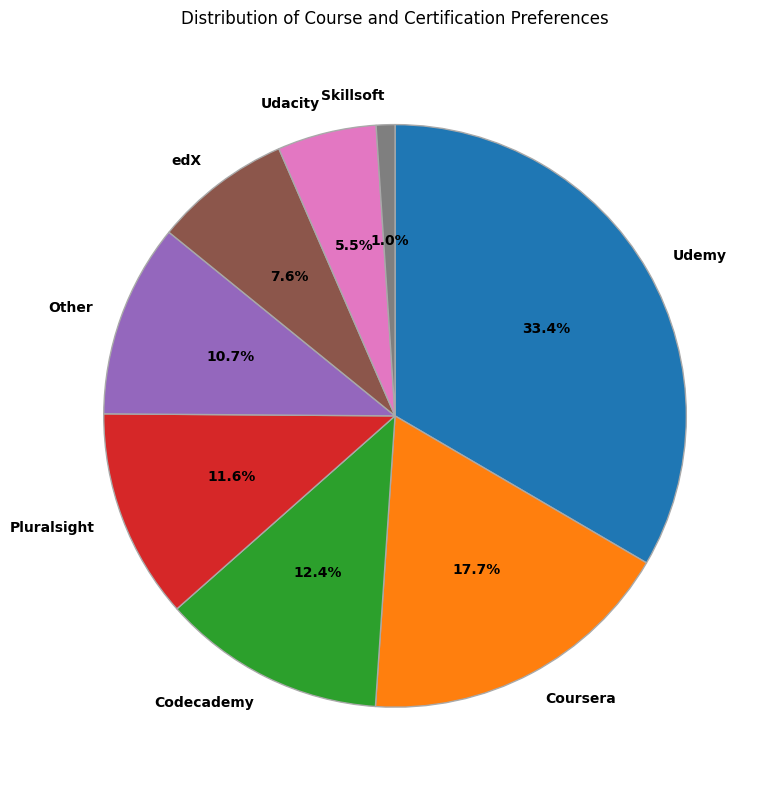

In [39]:
# Assuming df is your DataFrame and 'LearnCodeCoursesCert' is a column in it
# Example DataFrame creation for demonstration purposes (you can skip this part)
# data = {'LearnCodeCoursesCert': ['Other', 'Other;Codecademy;edX', 'Udemy', 'Codecademy;edX', 'Udemy;Pluralsight']}
# df = pd.DataFrame(data)

# Split the 'LearnCodeCoursesCert' column by ';' and then explode it into a long Series
LearnCodeCoursesCert = df['LearnCodeCoursesCert'].str.split(';').explode()

# Count occurrences of each value
occurrence = LearnCodeCoursesCert.value_counts()


import matplotlib.pyplot as plt

# Assuming `occurrence` is defined as in your previous code

# Define a list of colors for the pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot the occurrences using a pie chart with the defined color theme
fig, ax = plt.subplots()
occurrence.plot.pie(autopct="%.1f%%", ax=ax, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'darkgray'}, colors=colors)

# Beautification (keeping the enhancements you preferred from the previous example)
ax.set_ylabel('')  # Remove the y-label
ax.set_title('Distribution of Course and Certification Preferences', pad=20)  # Title for the chart

# Improve legibility
plt.setp(ax.texts, fontweight=600)  # Bold text labels
ax.figure.set_size_inches(8, 8)  # Figure size adjustment

plt.tight_layout()
plt.show()




/var/folders/sg/0xjmcw_15nq41ctx8fknnyhw0000gn/T/ipykernel_29617/1433303106.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


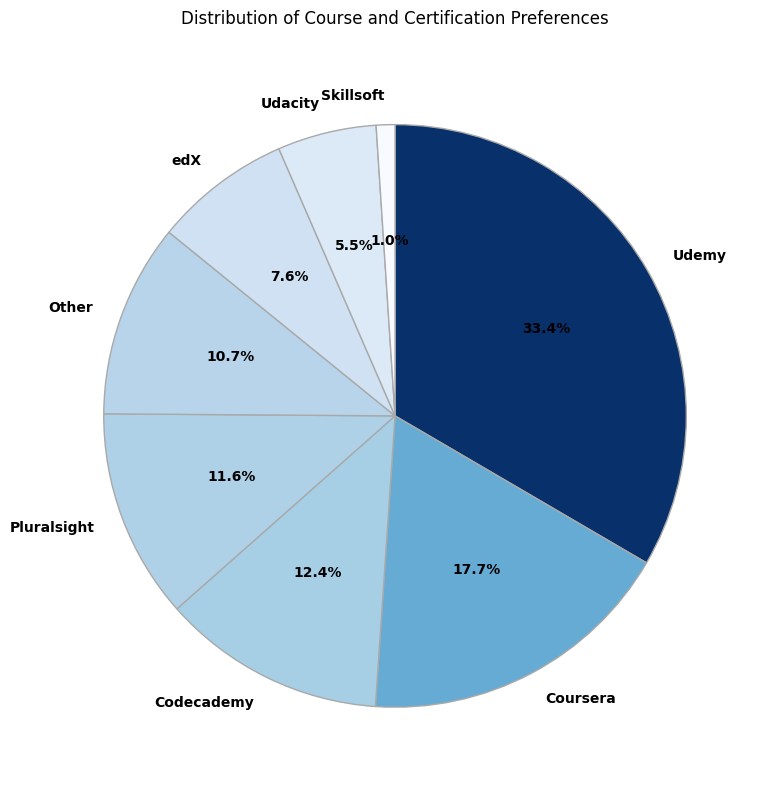

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Assuming `occurrence` is defined as in your previous code

# Normalize occurrence values for color mapping
norm = plt.Normalize(occurrence.min(), occurrence.max())
# Choose a colormap
cmap = cm.get_cmap('Blues')
# Create color mapping based on normalized values
colors = cmap(norm(occurrence.values))

# Plot the occurrences using a pie chart with dynamically generated colors
fig, ax = plt.subplots()
occurrence.plot.pie(autopct="%.1f%%", ax=ax, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'darkgray'}, colors=colors)

# Beautification (keeping the enhancements you preferred from the previous example)
ax.set_ylabel('')  # Remove the y-label
ax.set_title('Distribution of Course and Certification Preferences', pad=20)  # Title for the chart

# Improve legibility
plt.setp(ax.texts, fontweight=600)  # Bold text labels
ax.figure.set_size_inches(8, 8)  # Figure size adjustment

plt.tight_layout()
plt.show()


In [8]:
# Employment
df['Employment'].unique()

array([nan, 'Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Student, part-time',
       'Not employed, but looking for work;Student, full-time',
       'Employed, part-time;Student, part-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time', 'I prefer not to say',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Student, part-time',
       'Not employed, but looking for work;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Retired', 'Employed, full-time;Student, full-time',
       'Student, full-time;Student, part-time',
       '